<a href="https://colab.research.google.com/github/JennyDuda/Projeto-Olist/blob/main/Previs%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO DE PREVISÃO DE VENDAS - OLIST DATASET

**Objetivo:**  
Prever a receita diária do e-commerce Olist, analisando padrões de vendas e fatores que influenciam a receita.

**Dataset:**  
- Dataset oficial Olist disponível no Kaggle.  
- Principais tabelas: `orders`, `order_items`, `products`.  
- Período: 2016 a 2018 (aproximadamente).  
- Colunas principais usadas: preço, quantidade de pedidos, data da compra, categoria de produtos.

**Metodologia:**  
1. Limpeza e preparação dos dados.  
2. Análise exploratória e visualizações.  
3. Modelagem preditiva com Linear Regression, Random Forest e Gradient Boosting.  
4. Geração automática de insights e conclusões.  
5. Resultados salvos para futuras análises e apresentações.

**Aplicações:**  
- Identificação de dias, meses e produtos mais lucrativos.  
- Base para planejamento de estoque, marketing e estratégias de vendas.

Baixando dataset via KaggleHub...
Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Datasets carregados com sucesso!

Verificação de dados ausentes:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64


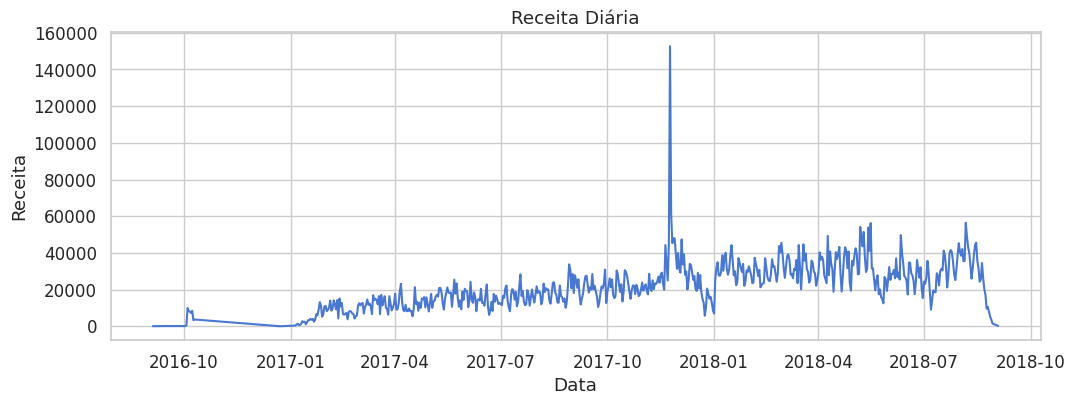

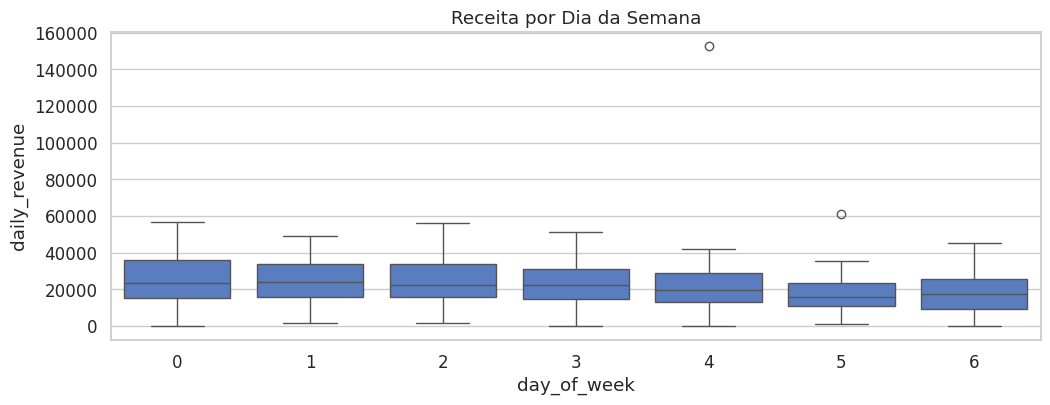

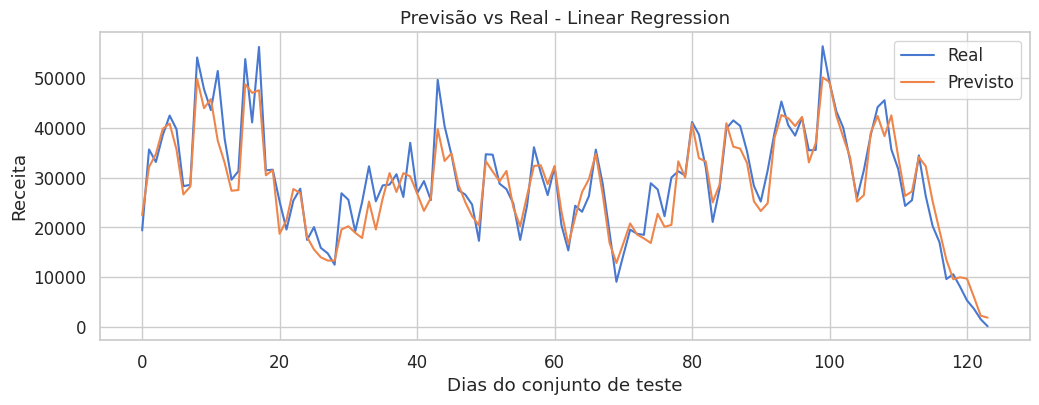

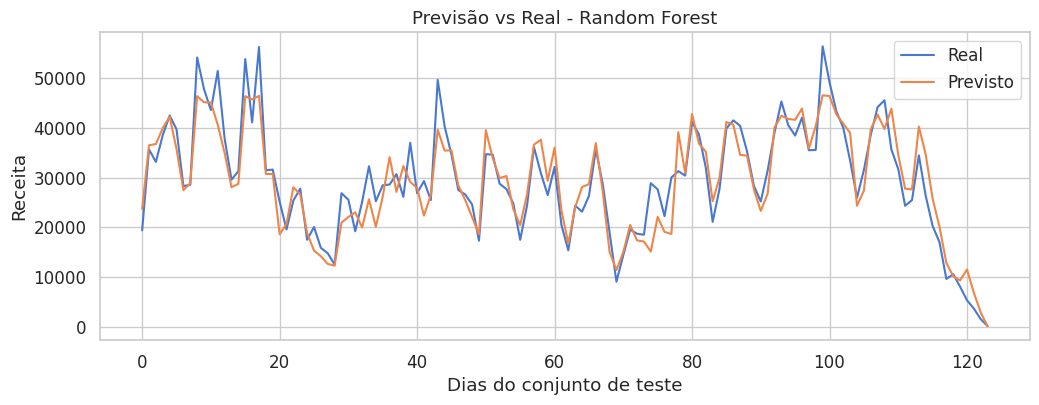

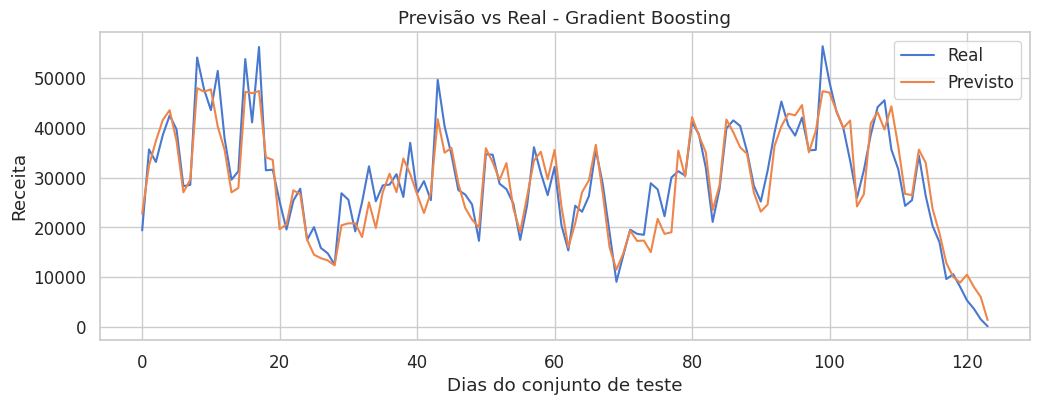

Comparativo de Modelos:


,RMSE,MAE,R2
Linear Regression,3944.073597,3010.105616,0.876010
Random Forest,4263.914040,3282.365993,0.855085
Gradient Boosting,4166.084698,3262.891106,0.861658


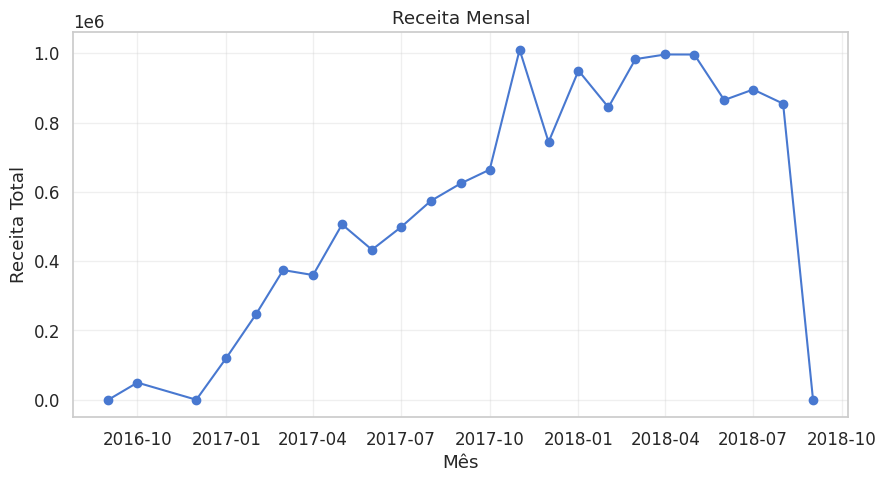

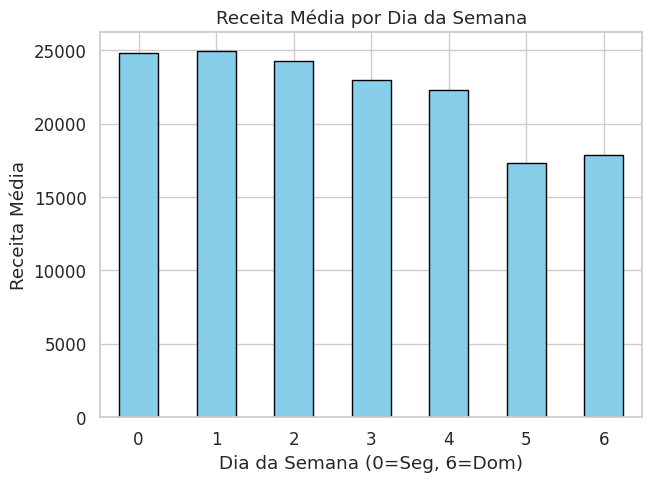

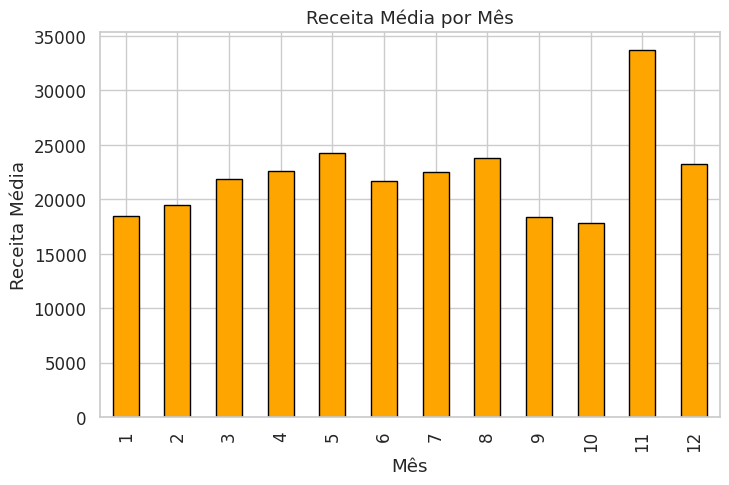


=== INSIGHTS E CONCLUSÕES COMPLETOS ===

Melhor modelo de previsão: Linear Regression (RMSE=3944.07, MAE=3010.11, R²=0.88)
Receita média diária: R$ 22064.36
Dia com maior receita: 2017-11-24
Dia com menor receita: 2016-12-23
Crescimento médio mensal: 48790.24%
Dia da semana mais lucrativo: 1 (0=Segunda, 6=Domingo)
Mês com maior média de receita: 11
Ticket médio por pedido: R$ 137.75

Top 5 produtos por quantidade vendida:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

Top 5 produtos por receita:
product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
Name: price, dtype: float64

Top 5 categorias por receita:
product_cate

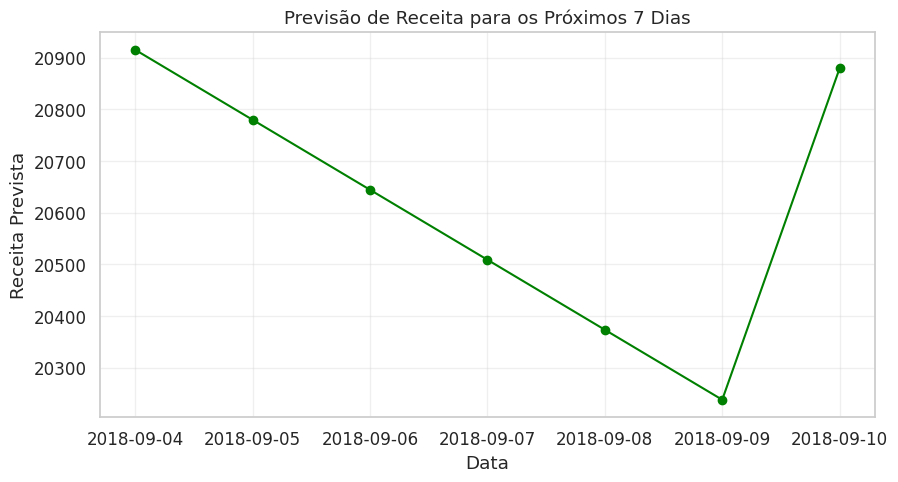


=== RESUMO FINAL ===
O modelo Linear Regression apresenta melhor desempenho para previsão de receita.
Observa-se crescimento médio mensal de 48790.24%, com maior faturamento nos dias 1 da semana e no mês 11.
O ticket médio por pedido é de R$ 137.75, e há 202 dias de queda significativos.
Produtos e categorias mais lucrativos podem ser priorizados para marketing e estoque.
As vendas apresentam variação diária com desvio padrão de 12594.03, indicando a estabilidade do negócio.

Previsão de receita para os próximos 7 dias:
2018-09-04: R$ 20915.55
2018-09-05: R$ 20780.07
2018-09-06: R$ 20644.6
2018-09-07: R$ 20509.12
2018-09-08: R$ 20373.64
2018-09-09: R$ 20238.16
2018-09-10: R$ 20879.74

O gráfico acima mostra a tendência esperada, permitindo planejamento de estoque, marketing e estratégias de vendas para os próximos dias.

Arquivos salvos em 'outputs/'


In [16]:
# ============================================
# PREVISÃO DE VENDAS - OLIST DATASET
# Versão final otimizada e ajustada com melhorias
# ============================================

# -----------------------------
# IMPORTAÇÃO E CONFIGURAÇÃO
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import kagglehub
import os

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# -----------------------------
# DOWNLOAD E CARREGAMENTO DO DATASET
# -----------------------------
print("Baixando dataset via KaggleHub...")
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
orders = pd.read_csv(f"{path}/olist_orders_dataset.csv")
order_items = pd.read_csv(f"{path}/olist_order_items_dataset.csv")
products = pd.read_csv(f"{path}/olist_products_dataset.csv")
print("Datasets carregados com sucesso!")

# -----------------------------
# JUNÇÃO E PREPARAÇÃO DE DADOS
# -----------------------------
data = pd.merge(order_items, orders, on="order_id", how="inner")
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])

# Checagem de dados ausentes
print("\nVerificação de dados ausentes:")
print(data.isnull().sum())

daily_sales = data.groupby(data["order_purchase_timestamp"].dt.date).agg({
    "price": "sum",
    "order_id": "nunique"
}).rename(columns={"price": "daily_revenue", "order_id": "num_orders"}).reset_index()

daily_sales["order_purchase_timestamp"] = pd.to_datetime(daily_sales["order_purchase_timestamp"])
daily_sales["day_of_week"] = daily_sales["order_purchase_timestamp"].dt.dayofweek
daily_sales["month"] = daily_sales["order_purchase_timestamp"].dt.month
daily_sales["day"] = daily_sales["order_purchase_timestamp"].dt.day

# -----------------------------
# VISUALIZAÇÃO INICIAL
# -----------------------------
plt.figure(figsize=(12,4))
sns.lineplot(x="order_purchase_timestamp", y="daily_revenue", data=daily_sales)
plt.title("Receita Diária")
plt.xlabel("Data")
plt.ylabel("Receita")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x="day_of_week", y="daily_revenue", data=daily_sales)
plt.title("Receita por Dia da Semana")
plt.show()

# -----------------------------
# MODELAGEM DE PREVISÃO
# -----------------------------
X = daily_sales[["num_orders","day_of_week","month","day"]]
y = daily_sales["daily_revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    plt.figure(figsize=(12,4))
    plt.plot(y_test.values, label="Real")
    plt.plot(y_pred, label="Previsto")
    plt.title(f"Previsão vs Real - {name}")
    plt.xlabel("Dias do conjunto de teste")
    plt.ylabel("Receita")
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results).T
print("Comparativo de Modelos:")
display(results_df)

# -----------------------------
# INSIGHTS E VISUALIZAÇÕES
# -----------------------------
monthly_revenue = daily_sales.groupby(daily_sales['order_purchase_timestamp'].dt.to_period('M'))['daily_revenue'].sum()
monthly_revenue = monthly_revenue[monthly_revenue > 0]
monthly_growth = monthly_revenue.pct_change().median() * 100

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index.to_timestamp(), monthly_revenue.values, marker="o")
plt.title("Receita Mensal")
plt.xlabel("Mês")
plt.ylabel("Receita Total")
plt.grid(True, alpha=0.3)
plt.show()

dow_revenue = daily_sales.groupby('day_of_week')['daily_revenue'].mean()
plt.figure(figsize=(7,5))
dow_revenue.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Receita Média por Dia da Semana")
plt.xlabel("Dia da Semana (0=Seg, 6=Dom)")
plt.ylabel("Receita Média")
plt.xticks(rotation=0)
plt.show()

month_revenue = daily_sales.groupby('month')['daily_revenue'].mean()
plt.figure(figsize=(8,5))
month_revenue.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Receita Média por Mês")
plt.xlabel("Mês")
plt.ylabel("Receita Média")
plt.show()

# Top produtos e categorias
top_products_qty = order_items['product_id'].value_counts().head(5)
top_products_revenue = order_items.groupby('product_id')['price'].sum().sort_values(ascending=False).head(5)
if 'product_category_name' in products.columns:
    merged_products = order_items.merge(products, on='product_id', how='left')
    category_revenue = merged_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(5)

# -----------------------------
# INSIGHTS E CONCLUSÕES COMPLETOS COM PREVISÃO FUTURA
# -----------------------------

print("\n=== INSIGHTS E CONCLUSÕES COMPLETOS ===\n")

# Melhor modelo
melhor_modelo = results_df["R2"].idxmax()
rmse_best = results_df.loc[melhor_modelo, "RMSE"]
mae_best = results_df.loc[melhor_modelo, "MAE"]
r2_best = results_df.loc[melhor_modelo, "R2"]
print(f"Melhor modelo de previsão: {melhor_modelo} (RMSE={rmse_best:.2f}, MAE={mae_best:.2f}, R²={r2_best:.2f})")

# Receita média, dia de maior e menor receita
media_diaria = daily_sales['daily_revenue'].mean()
dia_max = daily_sales.loc[daily_sales['daily_revenue'].idxmax(),'order_purchase_timestamp'].date()
dia_min = daily_sales.loc[daily_sales['daily_revenue'].idxmin(),'order_purchase_timestamp'].date()
print(f"Receita média diária: R$ {media_diaria:.2f}")
print(f"Dia com maior receita: {dia_max}")
print(f"Dia com menor receita: {dia_min}")

# Crescimento médio mensal
monthly_revenue = daily_sales.groupby(daily_sales['order_purchase_timestamp'].dt.to_period('M'))['daily_revenue'].sum()
monthly_growth = monthly_revenue.pct_change().mean() * 100
print(f"Crescimento médio mensal: {monthly_growth:.2f}%")

# Dia da semana mais lucrativo
dow_revenue = daily_sales.groupby('day_of_week')['daily_revenue'].mean()
best_day = dow_revenue.idxmax()
print(f"Dia da semana mais lucrativo: {best_day} (0=Segunda, 6=Domingo)")

# Mês mais lucrativo
month_revenue = daily_sales.groupby('month')['daily_revenue'].mean()
best_month = month_revenue.idxmax()
print(f"Mês com maior média de receita: {best_month}")

# Ticket médio diário
ticket_medio = daily_sales['daily_revenue'].sum() / daily_sales['num_orders'].sum()
print(f"Ticket médio por pedido: R$ {ticket_medio:.2f}")

# Top 5 produtos por quantidade e receita
top_products_qty = order_items['product_id'].value_counts().head(5)
top_products_revenue = order_items.groupby('product_id')['price'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 produtos por quantidade vendida:")
print(top_products_qty)
print("\nTop 5 produtos por receita:")
print(top_products_revenue)

# Top 5 categorias por receita
if 'product_category_name' in products.columns:
    merged_products = order_items.merge(products, on='product_id', how='left')
    category_revenue = merged_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 categorias por receita:")
    print(category_revenue)

# Dias de queda e estabilidade
mean_revenue = daily_sales['daily_revenue'].mean()
low_days = daily_sales[daily_sales['daily_revenue'] < mean_revenue * 0.7].shape[0]
std_revenue = daily_sales['daily_revenue'].std()
print(f"\nNúmero de dias com receita 30% abaixo da média: {low_days}")
print(f"Desvio padrão da receita diária: {std_revenue:.2f}")

# -----------------------------
# PREVISÃO FUTURA
# -----------------------------
from datetime import timedelta

# Gerar datas futuras
last_date = daily_sales['order_purchase_timestamp'].max()
future_days = pd.DataFrame({'order_purchase_timestamp': [last_date + timedelta(days=i) for i in range(1,8)]})
future_days["day_of_week"] = future_days['order_purchase_timestamp'].dt.dayofweek
future_days["month"] = future_days['order_purchase_timestamp'].dt.month
future_days["day"] = future_days['order_purchase_timestamp'].dt.day
future_days["num_orders"] = daily_sales['num_orders'].median()  # ou estimativa baseada em tendência

# Previsão usando o melhor modelo
if melhor_modelo == "Linear Regression":
    X_future = scaler.transform(future_days[["num_orders","day_of_week","month","day"]])
    future_pred = models[melhor_modelo].predict(X_future)
else:
    X_future = future_days[["num_orders","day_of_week","month","day"]]
    future_pred = models[melhor_modelo].predict(X_future)

# Gráfico da previsão futura
plt.figure(figsize=(10,5))
plt.plot(future_days['order_purchase_timestamp'], future_pred, marker='o', color='green')
plt.title("Previsão de Receita para os Próximos 7 Dias")
plt.xlabel("Data")
plt.ylabel("Receita Prevista")
plt.grid(True, alpha=0.3)
plt.show()

# -----------------------------
# RESUMO FINAL
# -----------------------------
print("\n=== RESUMO FINAL ===")
print(f"O modelo {melhor_modelo} apresenta melhor desempenho para previsão de receita.")
print(f"Observa-se crescimento médio mensal de {monthly_growth:.2f}%, com maior faturamento nos dias {best_day} da semana e no mês {best_month}.")
print(f"O ticket médio por pedido é de R$ {ticket_medio:.2f}, e há {low_days} dias de queda significativos.")
print("Produtos e categorias mais lucrativos podem ser priorizados para marketing e estoque.")
print("As vendas apresentam variação diária com desvio padrão de {:.2f}, indicando a estabilidade do negócio.".format(std_revenue))

print("\nPrevisão de receita para os próximos 7 dias:")
for date, value in zip(future_days['order_purchase_timestamp'].dt.date, future_pred.round(2)):
    print(f"{date}: R$ {value}")

print("\nO gráfico acima mostra a tendência esperada, permitindo planejamento de estoque, marketing e estratégias de vendas para os próximos dias.")

# -----------------------------
# SALVAR RESULTADOS
# -----------------------------
os.makedirs("outputs", exist_ok=True)
daily_sales.to_csv("outputs/daily_sales.csv", index=False)
results_df.to_csv("outputs/model_results.csv")
print("\nArquivos salvos em 'outputs/'")